In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/EPFL Account/ML Project 2/ml_project2/src
#specify the location like .../ml_project2/src


/content/drive/MyDrive/EPFL Account/ML Project 2/ml_project2/src


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path  = 'models/TRAIN_ON_GVA_REM_POS_'
"""Load the logs of all the models with each position removed. The last model
i.e. #9 is the full model with no position removed. Append the lowest validation
loss and corresponding accuracy and f1 for each and calculate means and stds. """

accu = []
los = []
f = []
for p in range(1, 10):
  full_path = path + str(p)
  val_loss = []
  val_acc = []  
  val_f1 = []
  for file in os.listdir(full_path):
    if file.endswith(".txt"):
      acc, f1, loss = np.loadtxt(os.path.join(full_path, file), delimiter=',', skiprows=1, usecols=(4, 5, 6), unpack=True)
      val_loss.append(np.min(loss))
      val_acc.append(acc[np.argmin(loss)])
      val_f1.append(f1[np.argmin(loss)])
  accu.append([np.mean(val_acc), np.std(val_acc)])
  f.append([np.mean(val_f1), np.std(val_f1)])
  los.append([np.mean(val_loss), np.std(val_loss)])


In [ ]:
los = np.array(los)
accu = np.array(accu)
f = np.array(f)

loss_mean = los[:-1, 0] - los[-1, 0] 
# subtract the mean of the full model from the reduced models
loss_std = np.sqrt((los[:-1, 1])**2 + (los[-1, 1])**2)  # add stds in quadrature

# same for accuracy and f1
acc_mean = accu[:-1, 0] - accu[-1, 0]
acc_std = np.sqrt((accu[:-1, 1])**2 + (accu[-1, 1])**2)


f1_mean = f[:-1, 0] - f[-1, 0]
f1_std = np.sqrt((f[:-1, 1])**2 + (f[-1, 1])**2)

print(f1_mean.shape)

(8,)


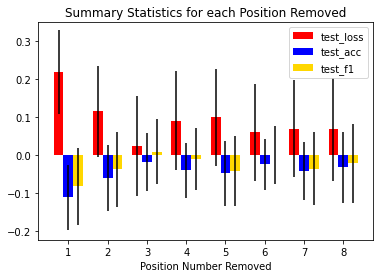

In [ ]:

for i in range(8):
  plt.bar(i+1 + -0.25, loss_mean[i], color = 'r', width = 0.25, yerr=loss_std[i])
  plt.bar(i+1 + 0., acc_mean[i], color = 'b', width = 0.25, yerr=acc_std[i])
  plt.bar(i+1 + 0.25, f1_mean[i], color = 'gold', width = 0.25, yerr=f1_std[i])

plt.title('Summary Statistics for each Position Removed')
plt.legend(['test_loss', 'test_acc','test_f1'], loc='upper right')
plt.xlabel('Position Number Removed')
plt.ylim(top=0.35)
#plt.savefig('Positions_Removed_Aggregate_Hist.pdf')
plt.show()